***
## **<center>Sistemas de Recomendação - *Content Based*</center>**


**<center>Processamento de Dados Massivos</center>**
***

<br>
Este notebook tem o objetivo de apresentar o roteiro para a construção de um sistema de recomendação que utiliza informações sobre o filme para a recomendação a um usuário. Esse tipo de sistema de recomendação é  chamado de "Content Based". Será utilizado o dataset disponibilizado pelo TMDb, encontrado no [Kaggle](https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset/)

In [ ]:
import pandas as pd

# carga dos dados
movies = pd.read_csv('https://raw.githubusercontent.com/alexvaroz/data_science_alem_do_basico/master/tmdb_movies_data.csv')

In [ ]:
movies.shape

(10866, 21)

In [ ]:
movies.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
# verificação dos valores nulos

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
movies.iloc[104].overview

'Movie star Vincent Chase, together with his boys, Eric, Turtle and Johnny, are backâ€¦and back in business with super agent-turned-studio head Ari Gold. Some of their ambitions have changed, but the bond between them remains strong as they navigate the capricious and often cutthroat world of Hollywood.'

In [ ]:
# Para viabilizar a análise, os campos com valores nulos serão substituídos por strings vazias.
movies = movies.fillna('')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10866 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   homepage              10866 non-null  object 
 8   director              10866 non-null  object 
 9   tagline               10866 non-null  object 
 10  keywords              10866 non-null  object 
 11  overview              10866 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  10866 non-null  object 
 15  release_date       

## Vetores de Texto

Para a construção de um Sistema de Recomendação Baseado em Conteúdo, será necessário analisar o conteúdo textual para que seja possível estimar a **similaridade** entre os elementos.

Em outras palavras, considere três filmes: A, B e C. Como provar matematicamente que a descrição ou enredo de A é mais semelhante a descrição de B do que ao de C (ou vice-versa)?

O primeiro passo para responder a essas perguntas é representar os textos (*documentos*) como quantidades matemáticas. Isso é feito representando esses documentos como vetores. Em outras palavras, cada documento é descrito como uma série de `n` números, onde cada número representa uma dimensão e `n` é o tamanho do vocabulário de todos os documentos juntos.

Mas quais são os valores desses vetores? A resposta a essa pergunta depende do vetorizador que estamos usando para converter nossos documentos em vetores. Duas abordagens mais simples utilizadas para essa conversão são: **Bag of Words** e **TF-IDF**.

A abordagem por **Bag of Words (BoW)** é a técnica mais primitiva de representar um documento. Nessa abordagem, cada documento é representado pela frequência de ocorrência de cada palavra. Imagine que temos três documentos, A, B e C, que são os seguintes:

A: Azul como a cor do mar

B: Como uma onda no mar

C: O céu é o mar de Brasília

O primeiro passo é converter esses documentos em suas formas vetoriais usando o método *CountVectorizer*, disponibilizado na biblioteca  `scikit-learn`.
Para isso, deve-se calcular o tamanho do vocabulário, sendo que vocabulário é o número de palavras distintas presentes em todos os documentos. Portanto, o vocabulário para este conjunto de três documentos é o seguinte: *azul, como, a, cor, do, mar, uma, onda, no, o, céu, é, de, brasília*. Consequentemente, o tamanho do vocabulário é **14**.

É prática comum excluir as palavras muito comuns que não agregam na análise do contexto, como artigos, preposições, conjunções e outras... Essas palavras são chamadas de *stopwords*. Sem elas, o vocabulário passa a ser:
azul, como, cor, mar, onda, céu, brasília

O tamanho do vocabulário agora é sete. Portanto, os documentos serão representados como vetores de sete dimensões e onde cada dimensão aqui representará o número de vezes que uma determinada palavra ocorre em um documento.

Portanto, usando a abordagem Bag of Words, os documentos A, B e C agora serão representados da seguinte forma:

A: (1, 1, 1, 1, 0, 0, 0)

B: (0, 1, 0, 1, 1, 0, 0)

C: (0, 0, 0, 1, 0, 1, 1)




In [ ]:
# Demosntração da criação dos textos em formato vetorial
# Utilizando a biblioteca scikitlearn
d1 = 'Azul como a cor do ar'
d2 = 'Como uma onda no mar'
d3 = 'O céu é o mar de Brasília'
corpus_exemplo = [d1, d2, d3]

vectorizer_example = CountVectorizer()
vectorizer_example_matrix=vectorizer_example.fit_transform(corpus_exemplo)

In [ ]:
vectorizer_example_matrix.toarray()

In [ ]:
vectorizer_example.get_feature_names_out()

In [ ]:
# para o português, teria que baixar uma lista pronta ou definir manualmente
stopwords_pt_lst = ['de', 'do', 'a', 'e', 'ou',  'no']
vectorizer_example = CountVectorizer(stop_words=stopwords_pt_lst)
vectorizer_example_matrix=vectorizer_example.fit_transform(corpus_exemplo)
vectorizer_example.get_feature_names_out()

In [ ]:
# questão das letras maiúsculas
# se alterarmos um pouco o exemplo colocando um documento todo com letra maiúscula
corpus_exemplo = [d1, d2.upper(), d3]

In [ ]:
vectorizer_example = CountVectorizer(stop_words=stopwords_pt)
vectorizer_example_matrix=vectorizer_example.fit_transform(corpus_exemplo)

In [ ]:
# os objetos CountVectorizer e TfidfVectorizer tratam todos as palavras como lower case
vectorizer_example.get_feature_names_out()

Nessa abordagem, as palavras não recebem peso diferente, mas nem sempre é assim...

Por exemplo, considere um corpus de documentos sobre cães. Provavelmente, todos os documentos possuirão de forma frequente a palavra *cachorro*. Logo, a presença da palavra `cachorro` não merece tanto destaque quanto outra palavra que aparece apenas em alguns documentos, e acaba exercendo um papel de diferenciação.

Para contornar essa situação, foi desenvolvido a abordagem TF-IDF (*Term Frequency-Inverse Document Frequency*) caracterizada por atribuir, ao invés da frequencia, como o BoW, um índice de **relevância** calculado para cada palavra, segundo a seguinte fórmula:
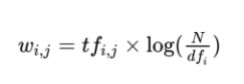


Onde:

* **wi,j** é o peso da palavra i no documento j
* **dfi** é o número de documentos que contêm o termo i
* **N** é o número total de documentos

Dá para verificar que o peso de uma palavra em um documento é maior se ela ocorrer com mais frequência nesse documento e, ao mesmo tempo, estiver presente em menos documentos. O peso **wi,j** assume valores entre 0 e 1.

In [ ]:
# Utilizando o exemplo
# Se a opção for pelo TFIDF (mais recomendada...)
from sklearn.feature_extraction.text import TfidfVectorizer

# Instancia um objeto TF-IDF Vectorizer removendo as stopwords em inglês. Remove all english stopwords
tfidf = TfidfVectorizer(stop_words=stopwords_pt)

#Cria a matriz TF-IDF matriz executando o método "fit_transform"
tfidf_matriz = tfidf.fit_transform(corpus_exemplo)
tfidf.get_feature_names_out()

In [ ]:
tfidf_matriz.toarray()

Com os textos transformados em vetores, é possível verificar a similaridade (ou proximidade) entre eles usando métricas de similaridade como:

* Similaridade por Cosseno (*Cosine Similarity*)
* Distância Euclidiana
* Correlação de Pearson
* Distância de Jaccard

Cada uma dessas é apropriada para determinados cenários. Por exemplo, se a magnitude da distância é relevante, a `Distância Euclidiana`seria a mais apropriada. Enquanto, se o desejável é a obtenção de uma distância relativa, que evidencie uma correlação, a `Similaridade por Cosseno` ou a `Correlação de Pearson`se tornam mais adequadas.

Nos sistemas de recomendação é mais comum a utilização da `Similaridade por Cosseno`, calculada segundo a seguinte forma:

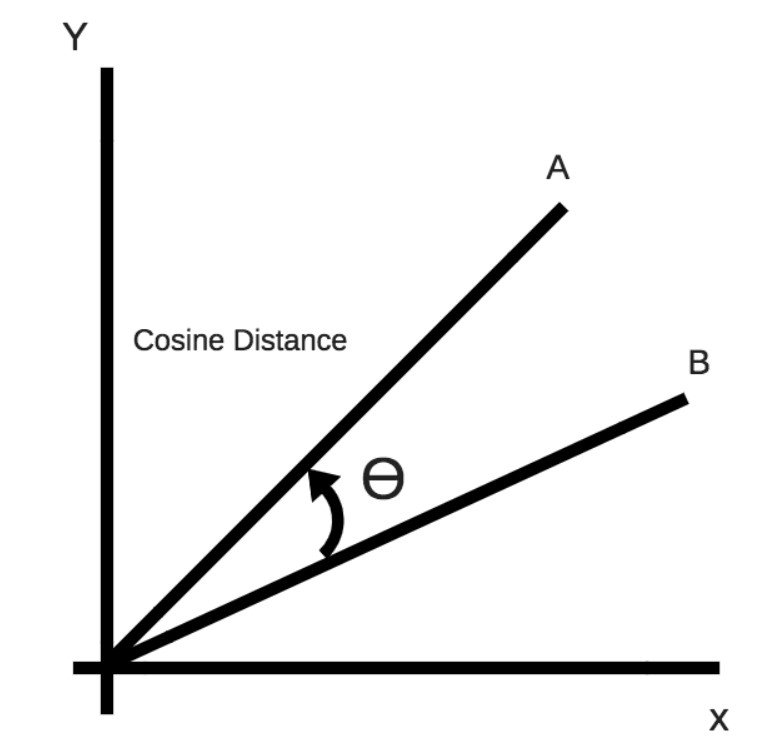

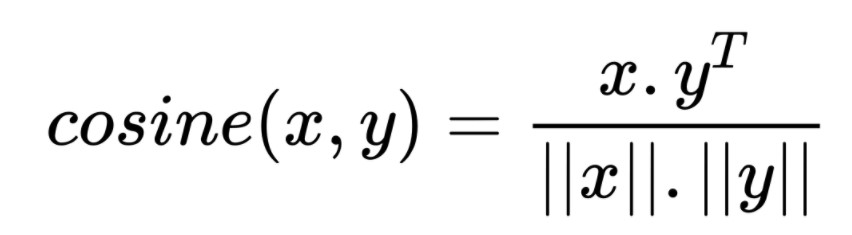

A similaridade por cosseno calcula o cosseno do ângulo entre dois vetores em um espaço n-dimensional. Quando o cosseno é 1 (ou seja, o ângulo é 0), os vetores são exatamente semelhantes. Por outro lado, uma pontuação de cosseno de 0 (ou ângulo de 90 graus) denota que os dois vetores são totalmente diferentes um do outro.

A representação vetorial de textos e a análise de similaridade entre eles serão objetos de estudo no campo chamado Processamento de Linguagem Natural (NLP, *Natural Language Processing*)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Obter a matriz com a similaridade por cosseno entre os registros
cosine_sim = linear_kernel(tfidf_matriz)
cosine_sim

### Partindo para o exemplo do sistema de recomendação de filmes

Inicialmente, será considerada como informação do filme, somente a sua descrição, presente no campo `overview`.

In [ ]:
# Se a opção for pelo BoW
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# Se a opção for pelo TFIDF (mais recomendada...)
from sklearn.feature_extraction.text import TfidfVectorizer



In [ ]:
# verificação do formato da matriz gerada


In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Obter a matriz com a similaridade por cosseno entre os registros


A matriz de similaridade por cosseno apresenta a similaridade entre os filmes. Logo, a diagonal principal terá o valor constante de `1`, pois se relacionará com ele mesmo.

O próximo passo será construir uma função que ao receber um título de filme, recomende os 10 mais similares de acordo com a similaridade calculada para a descrição do filme.

Como a consulta será pelo título, deverá ser criado um índice reverso, tendo o título como chave.

In [ ]:
movies.index

In [ ]:
# Lembrando de eliminar eventuais nomes de título dupicados
distinct_titles = pd.Series(movies['original_title'], index=movies.index).drop_duplicates(keep='last')

In [ ]:
indice_reverso = pd.Series(distinct_titles.index, index = distinct_titles.values)

In [ ]:
indice_reverso['Frozen']

Segue o caminho para a construção da função do sistema de recomendação:

* O título do filme será o argumento.
* Como título, o índice do filme é obtido pelo índice reverso criado.
* Com o índice, a matriz de similaridade é consultada para se obter os filmes com maiores pontuações.
* Na lista de filmes mais similares, o primeiro será o próprio consultado, logo, deverá ser desconsiderado.
* Retorne os títulos correspondentes aos índices dos elementos obtidos.

In [ ]:
def recomendar_por_conteudo(title, cosine_sim=cosine_sim, df=movies, indice=indice_reverso):
    # Obtenção do índice pelo título
    idx = indice[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    # recuperação dos valores filtrados do índice pela matriz de similaridade
    # É passada uma lista
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)
    # A lista é ordenada
    # São separados os 10 maiores valores, excluindo o primeiro
    sim_scores = sim_scores[1:11]
    # São recuperados os índices relativos aos 10 filmes
    movie_indices = [i[0] for i in sim_scores]
    # COm os índices é possível obter as informações sobre os filmes
    return df[['original_title', 'genres', 'overview', 'runtime',
                   'vote_average', 'vote_count']].loc[movie_indices]

Para testar, que tal o título "O Poderoso Chefão", em inglês "The Godfather"

In [ ]:
# recomendar_por_conteudo('The Lion King')


O resultado pode ser considerado interessante, mas pode-se avançar em uma função de recomendação que utilize mais metadados como gêneros, elenco, equipe e palavras-chave (ou subgêneros). É esperado que os resultados sejam melhores pois conseguirá captar o gosto do usuário por determinado diretor, ator, subgênero e assim por diante.

## Agregando mais metadados ao sistema de recomendação

Serão utilizados os seguintes metadados:

* Gêneros
* Diretor
* Atores
* Palavras chave
* Descrição breve (*tagline*)

O plano é construir um grande conjunto de informações e vetorizar tudo. Daí utilizando a similaridade por cosseno serão encontrados os itens mais similares.

Cada metadado deverá ser tratado para isso.


### Gêneros (*genres*)

Já foi visto que essa informação se encontra em uma string com os termos separados por um '|'. Será seguido o mesmo procedimento para obter-se a lista de strings.

Será criado o atributo `genres_lst`:



### Diretor (*director*)

Vale a pena verificar se se trata de somente 1 diretor por filme, para isso, pode-se verificar a presença do caracter '|' , visto que é o artifício utilizado para separar diferentes nomes nos outros campos.

In [ ]:
movies[movies['director'].str.find('|')!=-1]

Quebrar o nome do diretor em palavras pode não ser uma boa ideia, visto que se dois diretores aparecerem com o mesmo primeiro nome pode dar um peso que seria indesejado. Uma aboradagem seria transformar as letras todas em minúsculas e retirar os espaços, resultando em um nome que dificilmente seria confundido com outro, prejudicando a recomendação.

### Elenco (*cast*)


O tratamento para o elenco será uma mescla do tratamento para o gênero com o utilizado no diretor.

Para não correr o risco de prejudicar a recomendação, vamos definir um número de 3 atores para compor a informação por filme.

### Palavras chave (*keywords*)

O tratamento pode ser o mesmo do efetuado quanto ao elenco, inclusive quanto ao número, visto que ele varia nos filmes.

### Descrição breve (*taglines*)

Como se trata de um texto bem curto, terá o mesmo tratamento do efetuado na descrição no caso anterior. Será gerada uma lista de palavras e retiradas as stopwords.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

def remover_pontuacao(texto):
  import string
  return texto.translate(texto.maketrans('', '', string.punctuation))


def tratar_tagline(texto, stopwords = stopwords.words('english')):
  try:
    texto = remover_pontuacao(texto)
    return [i.lower() for i in texto.split() if i.lower() not in stopwords]
  except:
    return []

In [ ]:
movies['tagline_str'] = movies.apply(lambda row:tratar_tagline(row['tagline']), axis=1 )

### Consolidação dos metadados tratados

Finalmente, após o tratamento de cada um dos novos metadados, eles serão agrupados para a criação de um novo vetor que será utilizado para o cômputo da similaridade.

De posse do novo corpus, segue-se para a vetorização utilizando o TFIDF, conforme abordagem utilizada quando o foco foi a descrição do filme.

In [ ]:
# Cria a matriz TF-IDF matriz executando o método "fit_transform"


In [ ]:
# verificar o "shape" da matriz criada

In [ ]:
# Obter a matriz com a similaridade por cosseno entre os registros


In [ ]:
#recomendar_por_conteudo('Forrest Gump')


Dar um peso maior para o diretor:

Qual um outro sistema de recomendação baseado em conteúdo você poderia criar??? Qual o valor que isso acrescentaria???